# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse 

## 1. Cargamos los datos

In [149]:
furni = pd.read_csv('data/df_furniture.csv', parse_dates = ['Month'], index_col = 'Month')
furni

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


## 2. Tratar la fecha como texto y parsear

In [150]:
# hecho en la celda de lectura

## 3. ¿De qué fecha a qué fecha va el histórico?

La serie va desde enero de 1992 a julio de 2019

In [151]:
print(furni.index.min())
print(furni.index.max())

1992-01-01 00:00:00
2019-07-01 00:00:00


In [152]:
furni.index = pd.date_range('1992-01-01', '2019-07-01', freq = 'MS')
furni

,furniture_price_adjusted
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304
2019-06-01,9431.337229


In [153]:
#range_dates = pd.date_range('1992-01-01', '2019-07-01', freq = 'MS')
#furni['new_date']=range_dates
#furni.tail()

In [155]:
#furni.drop('Month', axis = 1, inplace = True)
#furni.set_index('new_date')

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

Se ve que tiene una clara tendencia al alza, a pesar de una pequeña bajada en als acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

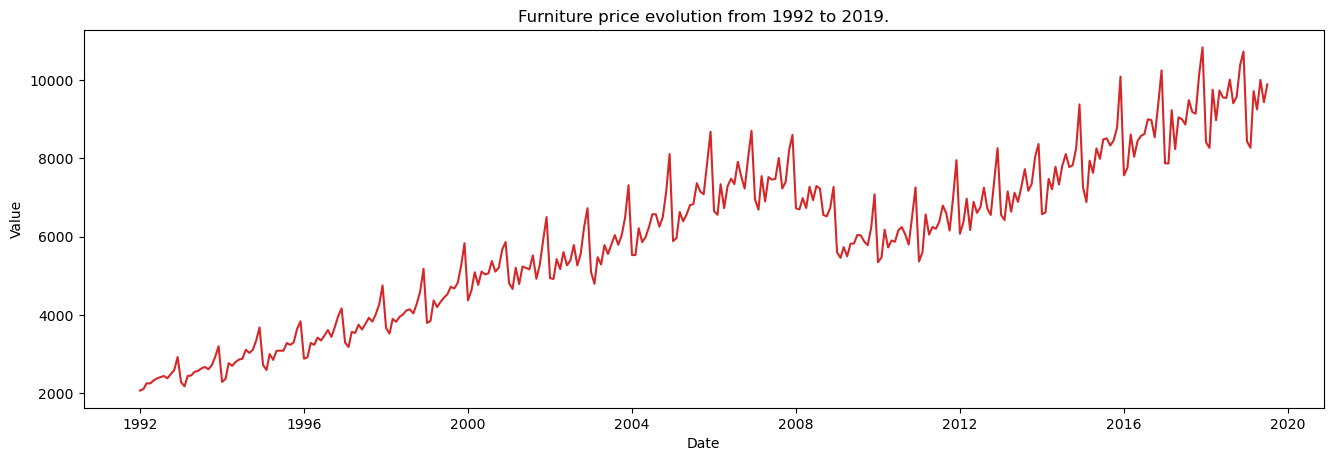

In [156]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(furni, x=furni.index, y=furni['furniture_price_adjusted'], title='Furniture price evolution from 1992 to 2019.') 

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [157]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# CALCULAMOS EL TEST ROOT STATIONARY:

result_test = adfuller(furni['furniture_price_adjusted'].values, autolag = 'AIC')
result_test[1]
# SI ES < 0,05 LA SERIE ES ESTACIONARIA, SI ES SUPERIOR ES NO ESTACIONARIA


0.7035529748090006

In [ ]:
# si cogemos dos ventanas temporales y comparamos sus estadisticos, si hay diferencia es que es estacionaria y si no varian es que no es estacionaria

In [158]:
furni.iloc[0:150,:].describe()

,furniture_price_adjusted
count,150.000000
mean,4131.559701
std,1246.859277
min,2073.432724
25%,3087.425486
50%,3996.578324
75%,5199.324058
max,7314.125882


In [159]:
furni.iloc[-150:,:].describe()

,furniture_price_adjusted
count,150.000000
mean,7587.131196
std,1320.487845
min,5349.481724
25%,6570.622232
50%,7372.292812
75%,8479.669352
max,10833.501852


## 6. ¿Conoces algún método para representar mejor la tendencia?

In [180]:
from statsmodels.nonparametric.smoothers_lowess import lowess
df_loess_15 = pd.DataFrame(lowess(furni['furniture_price_adjusted'], 
                                  np.arange(len(furni['furniture_price_adjusted']), 
                                  frac=0.15)[:, 1],
                           index=df_orig.index, 
                           columns=['furniture_price_adjusted'])
df_loess_15.plot();

SyntaxError: invalid syntax (<ipython-input-180-9424567f4856>, line 7)

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

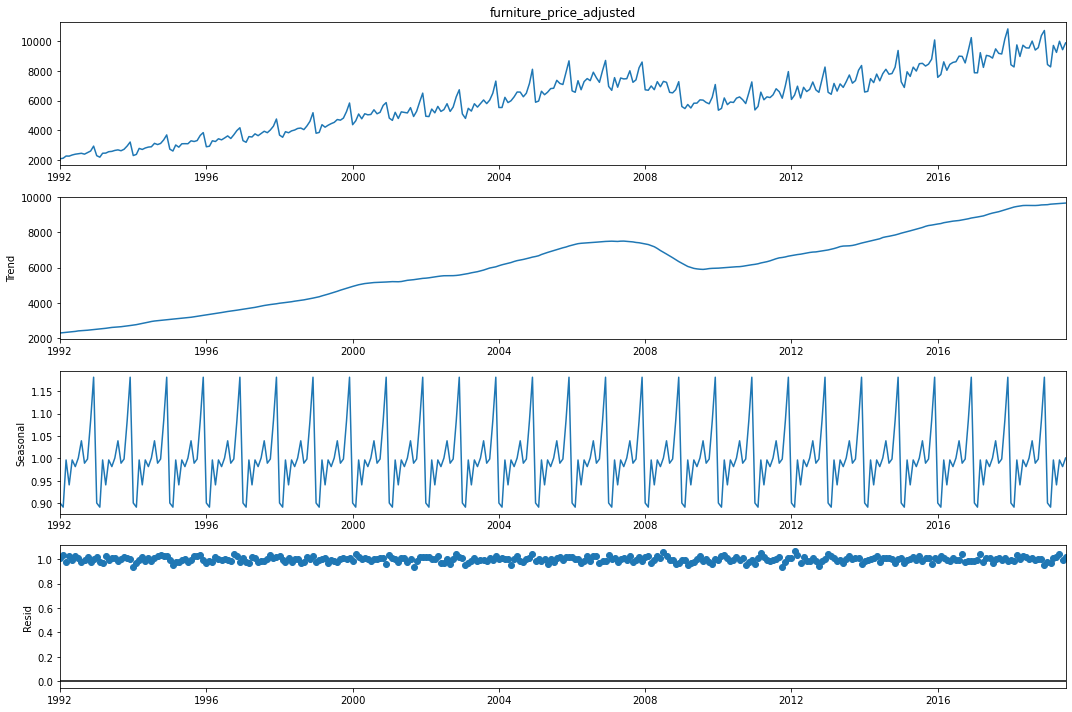

In [178]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mult = seasonal_decompose(furni['furniture_price_adjusted'], model = 'multiplicative', extrapolate_trend = 'freq')
plt.rcParams.update({'figure.figsize': (15,10)})
result_mult.plot();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

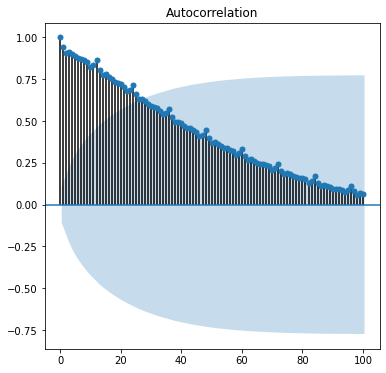

In [161]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(furni['furniture_price_adjusted'], lags=100);

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [162]:
furni['lag1'] = furni['furniture_price_adjusted'].shift(1)
furni['lag2'] = furni['furniture_price_adjusted'].shift(2)
furni['lag3'] = furni['furniture_price_adjusted'].shift(3)
furni['lag4'] = furni['furniture_price_adjusted'].shift(4)
furni['lag5'] = furni['furniture_price_adjusted'].shift(5)
furni.head()

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN
1992-05-01,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724,NaN


In [163]:
furni.corr()

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
furniture_price_adjusted,1.000000,0.951005,0.928338,0.945035,0.940613,0.935901
lag1,0.951005,1.000000,0.950599,0.927538,0.944637,0.939980
lag2,0.928338,0.950599,1.000000,0.950224,0.926949,0.944155
lag3,0.945035,0.927538,0.950224,1.000000,0.949927,0.926156
lag4,0.940613,0.944637,0.926949,0.949927,1.000000,0.949554
lag5,0.935901,0.939980,0.944155,0.926156,0.949554,1.000000


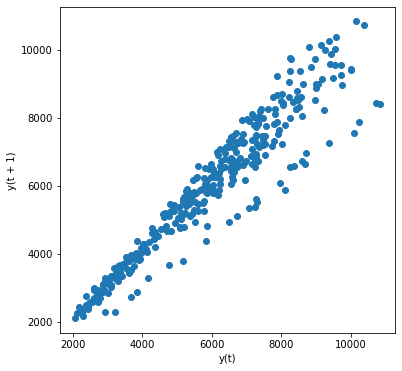

In [164]:
from pandas.plotting import lag_plot

lag_plot(furni['furniture_price_adjusted'])

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

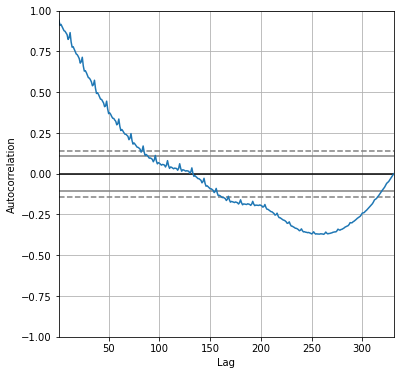

In [165]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(furni['furniture_price_adjusted'].to_list());

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

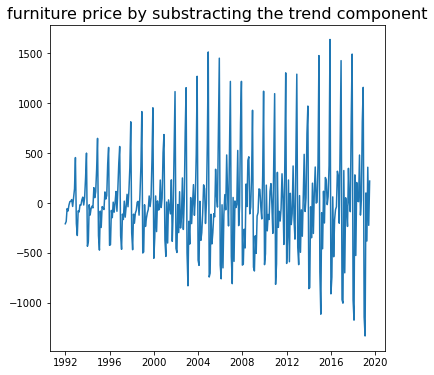

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(furni['furniture_price_adjusted'], model='aditive', extrapolate_trend='freq')
detrended = furni['furniture_price_adjusted'].values - result_mul.trend
plt.plot(detrended)
plt.title('furniture price by substracting the trend component', fontsize=16);